In [42]:
import numpy as np
import matplotlib.pyplot as plt

In [43]:
# This is the auxiliary code for the 3F8 coursework. Some parts are missing and
# should be completed by the student. These are Marked with XXX

# We load the data

In [44]:

X = np.loadtxt('X.txt')
y = np.loadtxt('y.txt')

# We randomly permute the data

permutation = np.random.permutation(X.shape[ 0 ])
X = X[ permutation, : ]
y = y[ permutation ]


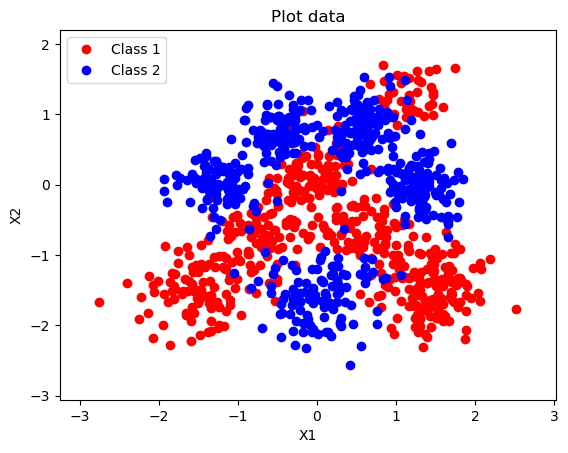

In [58]:
# We plot the data


def plot_data_internal(X, y):
    """Function that plots the points in 2D together with their labels

Inputs:

X: 2d array with the input features

y: 1d array with the class labels (0 or 1)

Output: 2D matrices with the x and y coordinates of the points shown in the plot"""
    x_min, x_max = X[ :, 0 ].min() - .5, X[ :, 0 ].max() + .5
    y_min, y_max = X[ :, 1 ].min() - .5, X[ :, 1 ].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    plt.figure()
    plt.xlim(xx.min(None), xx.max(None))
    plt.ylim(yy.min(None), yy.max(None))
    ax = plt.gca()
    ax.plot(X[y == 0, 0], X[y == 0, 1], 'ro', label = 'Class 1')
    ax.plot(X[y == 1, 0], X[y == 1, 1], 'bo', label = 'Class 2')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot data')
    plt.legend(loc = 'upper left', scatterpoints = 1, numpoints = 1)
    return xx, yy


def plot_data(X, y):
    """Function that plots the data without returning anything by calling "plot_data_internal".

Input:

X: 2d array with the input features

y: 1d array with the class labels (0 or 1)

Output: Nothing."""

    xx, yy = plot_data_internal(X, y)

    # Save the figure as a PNG file
    plt.savefig('Original_data.png')

    plt.show()
    



plot_data(X, y)




In [59]:
# We split the data into train and test sets

n_train = 800
X_train = X[ 0 : n_train, : ]
X_test = X[ n_train :, : ]
y_train = y[ 0 : n_train ]
y_test = y[ n_train : ]


def logistic(x): 
    """The logistic function"""
    return 1.0 / (1.0 + np.exp(-x))


def predict(X_tilde, w): 
    """Function that makes predictions with a logistic classifier

    Input:

        X_tile: matrix of input features (with a constant 1 appended to the left) 
        for which to make predictions

        w: vector of model parameters

    Output: The predictions of the logistic classifier"""
    return logistic(np.dot(X_tilde, w))

def compute_average_ll(X_tilde, y, w):
    """Function that computes the average loglikelihood of the logistic classifier on some data.

    Input:

    X_tile: matrix of input features (with a constant 1 appended to the left) 
          for which to make predictions

    y: vector of binary output labels 

    w: vector of model parameters

    Output: The average loglikelihood"""
    output_prob = predict(X_tilde, w)
    return np.mean(y * np.log(output_prob) + (1 - y) * np.log(1.0 - output_prob))



def get_x_tilde(X): 
    """Function that expands a matrix of input features by adding a column equal to 1.

    Input:

    X: matrix of input features.

    Output: Matrix x_tilde with one additional constant column equal to 1 added."""
    return np.concatenate((np.ones((X.shape[ 0 ], 1 )), X), 1)



def fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha):
    """Function that finds the model parameters by optimising the likelihood using gradient descent

Input:

X_tile_train: matrix of training input features (with a constant 1 appended to the left) 

y_train: vector of training binary output labels 

X_tile_test: matrix of test input features (with a constant 1 appended to the left) 

y_test: vector of test binary output labels 

alpha: step_size_parameter for the gradient based optimisation

n_steps: the number of steps of gradient based optimisation

Output: 

1 - Vector of model parameters w 

2 - Vector with average log-likelihood values obtained on the training set

3 - Vector with average log-likelihood values obtained on the test set"""
    w = np.random.randn(X_tilde_train.shape[ 1 ]) # Initialize weights with random values
    ll_train = np.zeros(n_steps) # Vector to store log-likelihood values for the training set
    ll_test = np.zeros(n_steps) # Vector to store log-likelihood values for the test set
    for i in range(n_steps):
        # Predict the probabilities using the sigmoid function
        sigmoid_value = predict(X_tilde_train, w) # Use your sigmoid function to get predictions

        # Compute the gradient of the log-likelihood
        gradient = X_tilde_train.T @ (y_train - sigmoid_value)  # Vectorized gradient

        # Update the weights using gradient ascent
        w = w + alpha * gradient  # Gradient-based update rule for w

        # Compute the log-likelihood for the training and test sets
        ll_train[ i ] = compute_average_ll(X_tilde_train, y_train, w) # Function to compute log-likelihood on the training set
        ll_test[ i ] = compute_average_ll(X_tilde_test, y_test, w) # Function to compute log-likelihood on the test set
        #print(ll_train[ i ], ll_test[ i ])
        # Print the log-likelihoods for training and testing sets at this step
        #print(f"Step {i + 1}: Training LL = {ll_train[i]}, Test LL = {ll_test[i]}")

    return w, ll_train, ll_test # Return the model parameters and log-likelihoods



def find_best_alpha(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha_values, tolerance=1e-4):
    """
    Function to find the optimal learning rate (alpha) by testing different values
    and tracking the number of iterations it takes to converge.

    Input:
    X_tilde_train: matrix of training input features (with a constant 1 appended to the left)
    y_train: vector of training binary output labels
    X_tilde_test: matrix of test input features (with a constant 1 appended to the left)
    y_test: vector of test binary output labels
    alpha_values: List of learning rates to test
    n_steps: maximum number of gradient descent steps
    tolerance: the convergence tolerance (default is 1e-4)

    Output:
    best_alpha: the learning rate that converged in the least number of steps
    best_w: the optimal model parameters for the best learning rate
    ll_train_best: vector of log-likelihood values for the training set
    ll_test_best: vector of log-likelihood values for the test set
    """
    best_alpha = None
    best_w = None
    min_steps = float('inf')  # Initialize with a large value
    ll_train_best = None
    ll_test_best = None
    steps_per_alpha = []

    # Loop through different learning rates
    for alpha in alpha_values:
        w = np.random.randn(X_tilde_train.shape[1])  # Initialize weights with random values
        ll_train = np.zeros(n_steps)  # Log-likelihood for the training set
        ll_test = np.zeros(n_steps)   # Log-likelihood for the test set
        converged = False

        for i in range(n_steps):
            # Predict the probabilities using the sigmoid function
            sigmoid_value = predict(X_tilde_train, w)

            # Compute the gradient of the log-likelihood
            gradient = X_tilde_train.T @ (y_train - sigmoid_value)

            # Update the weights using gradient ascent
            w = w + alpha * gradient

            # Compute the log-likelihood for the training and test sets
            ll_train[i] = compute_average_ll(X_tilde_train, y_train, w)
            ll_test[i] = compute_average_ll(X_tilde_test, y_test, w)

            # Check for convergence: if the change in log-likelihood is smaller than tolerance, stop
            if i > 0 and abs(ll_train[i] - ll_train[i - 1]) < tolerance:
                converged = True
                print(f"Converged at step {i + 1} with alpha={alpha}")
                break
        
        # If converged, check if this learning rate gives fewer steps to converge
        if converged and i < min_steps:
            min_steps = i
            best_alpha = alpha
            best_w = w
            ll_train_best = ll_train[:i+1]
            ll_test_best = ll_test[:i+1]
        
        # Store the number of steps for each alpha value
        steps_per_alpha.append(i + 1 if converged else n_steps)

    # Print the best alpha and the number of steps it took to converge
    print(f"Best alpha: {best_alpha} with {min_steps} steps to converge.")
    
    # Plotting the results
    plt.figure(figsize=(8, 6))
    plt.plot(alpha_values, steps_per_alpha, marker='o', linestyle='-', color='b')
    plt.xscale('log')  # Log scale for x-axis (learning rate)
    plt.xlabel('Learning Rate (alpha)')
    plt.ylabel('Steps to Convergence')
    plt.title('Learning Rate vs. Steps to Convergence')
    plt.grid(True)

    # Save the figure as a PNG file
    plt.savefig('best_alpha.png')

    plt.show()

    return best_alpha, best_w, ll_train_best, ll_test_best, min_steps


Converged at step 76 with alpha=0.00012742749857031334
Converged at step 81 with alpha=0.0001623776739188721
Converged at step 85 with alpha=0.00020691380811147902
Converged at step 65 with alpha=0.00026366508987303583
Converged at step 56 with alpha=0.0003359818286283781
Converged at step 44 with alpha=0.00042813323987193956
Converged at step 31 with alpha=0.000545559478116852
Converged at step 33 with alpha=0.0006951927961775605
Converged at step 33 with alpha=0.0008858667904100823
Converged at step 24 with alpha=0.0011288378916846883
Converged at step 19 with alpha=0.0014384498882876629
Converged at step 16 with alpha=0.0018329807108324356
Converged at step 11 with alpha=0.002335721469090121
Converged at step 8 with alpha=0.002976351441631319
Converged at step 6 with alpha=0.00379269019073225
Converged at step 5 with alpha=0.004832930238571752
Converged at step 6 with alpha=0.00615848211066026
Converged at step 6 with alpha=0.007847599703514606
Best alpha: 0.004832930238571752 with 

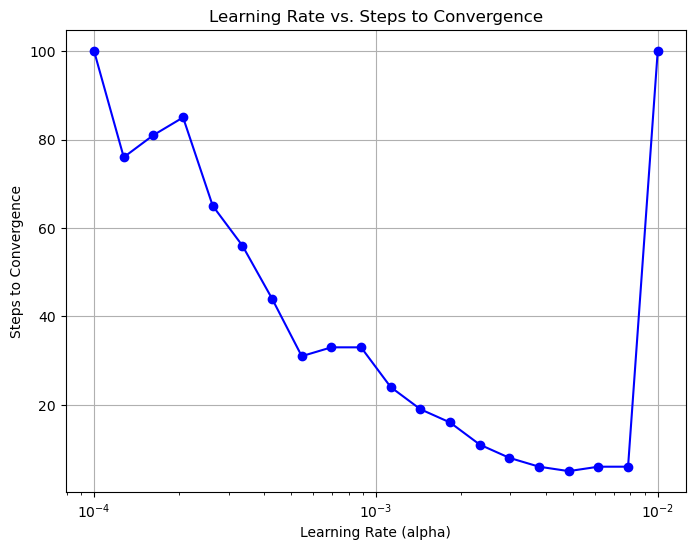

Best learning rate: 0.004832930238571752
Optimal weights: [ 0.37767724 -0.08424474  0.84011389]
Steps to converge for best alpha: 4


In [68]:

# Define training and test data
X_tilde_train = get_x_tilde(X_train)
X_tilde_test = get_x_tilde(X_test)

# Define possible alpha values
# try 1 - alpha_values = [1e-4, 1e-3, 1e-2, 1e-1, 1.0]
# try 2 - alpha_values = np.logspace(-4, -2, 5) # 5 values from 10^(-4) to 10^(-2)
alpha_values = np.logspace(-4, -2, 20) # 20 values from 10^(-4) to 10^(-2)

# Call the function to find the best alpha and plot the results
best_alpha, best_w, ll_train_best, ll_test_best, min_steps = find_best_alpha(X_tilde_train, y_train, X_tilde_test, y_test, 100, alpha_values)

# Best learning rate and model parameters
print(f"Best learning rate: {best_alpha}")
print("Optimal weights:", best_w)
print(f"Steps to converge for best alpha: {min_steps}")


# We train the classifier
#factor = 1000

#alpha = best_alpha/(factor*0.1) # Learning rate for gradient-based optimisation. To be completed by the student
#n_steps = factor*min_steps # Number of steps of gradient-based optimisation. To be completed by the student
alpha = 0.00005
n_steps = 10000

X_tilde_train = get_x_tilde(X_train)
X_tilde_test = get_x_tilde(X_test)
w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)


In [94]:

def plot_ll(ll):
    """Function that plots the average log-likelihood returned by "fit_w"

Input:

ll: vector with log-likelihood values

Output: Nothing"""
    plt.figure()
    ax = plt.gca()
    plt.xlim(0, len(ll) + 2)
    plt.ylim(min(ll) - 0.1, max(ll) + 0.1)
    ax.plot(np.arange(1, len(ll) + 1), ll, 'r-')
    plt.xlabel('Steps')
    plt.ylabel('Average log-likelihood')
    plt.title('Plot Average Log-likelihood Curve')

    # Save the figure as a PNG file
    #plt.savefig(f'average_ll{ll[0]}.png')

    plt.show()


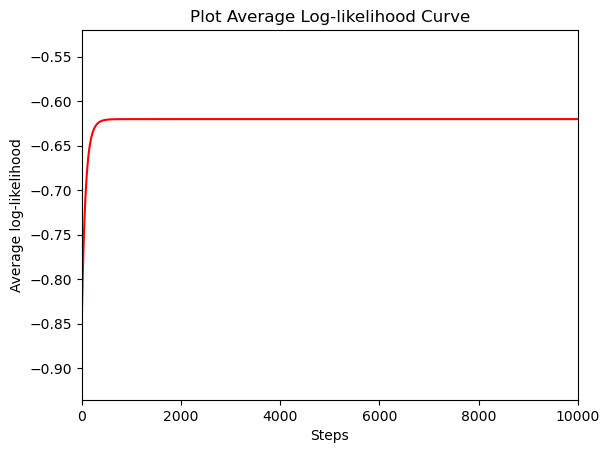

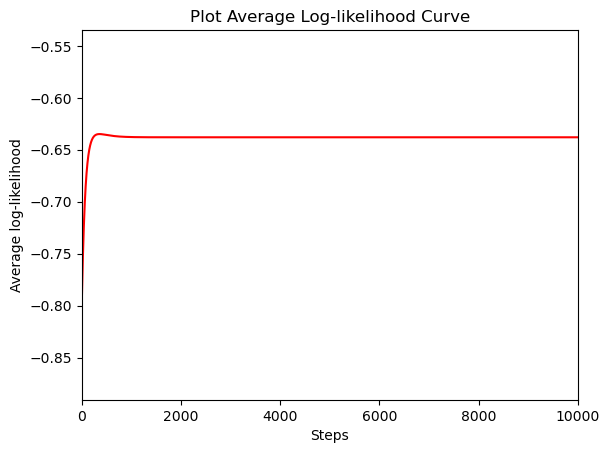

alpha =5e-05
steps=10000


In [75]:
# We plot the training and test log likelihoods

plot_ll(ll_train)
plot_ll(ll_test)

print(f"alpha ={alpha}")
print(f"steps={n_steps}")

In [101]:
def plot_predictive_distribution(X, y, w, map_inputs = lambda x : x):
    """Function that plots the predictive probabilities of the logistic classifier

Input:

X: 2d array with the input features for the data (without adding a constant column with ones at the beginning)

y: 1d array with the class labels (0 or 1) for the data

w: parameter vector

map_inputs: function that expands the original 2D inputs using basis functions.

Output: Nothing."""
    xx, yy = plot_data_internal(X, y)
    ax = plt.gca()
    X_tilde = get_x_tilde(map_inputs(np.concatenate((xx.ravel().reshape((-1, 1)), yy.ravel().reshape((-1, 1))), 1)))
    Z = predict(X_tilde, w)
    Z = Z.reshape(xx.shape)
    cs2 = ax.contour(xx, yy, Z, cmap = 'RdBu', linewidths = 2)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 14)

    # Save the figure as a PNG file
    plt.savefig(f'predictive.png')

    plt.show()

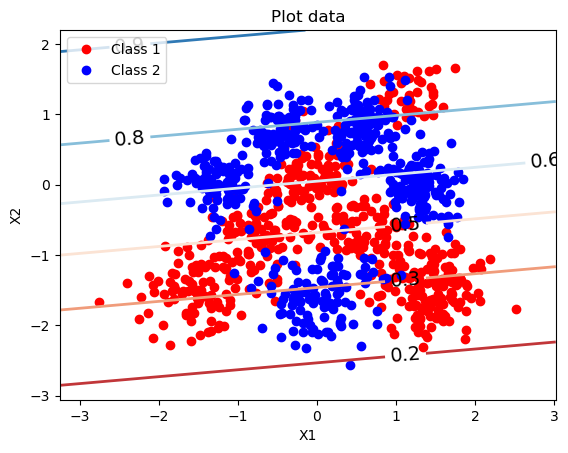

Final training log-likelihood per datapoint: -0.6202
Final test log-likelihood per datapoint: -0.6380


In [64]:
# We plot the predictive distribution

plot_predictive_distribution(X, y, w)


# Compute final log-likelihood per datapoint
final_ll_train = compute_average_ll(X_tilde_train, y_train, w)
final_ll_test = compute_average_ll(X_tilde_test, y_test, w)

print(f"Final training log-likelihood per datapoint: {final_ll_train:.4f}")
print(f"Final test log-likelihood per datapoint: {final_ll_test:.4f}")


Confusion Matrix:
          Predicted 0    Predicted 1
True 0    0.6972        0.3028
True 1    0.2637        0.7363


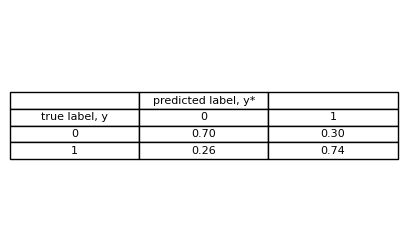

In [52]:
# Predict probabilities
y_test_pred_prob = predict(X_tilde_test, w)

# Apply threshold at τ = 0.5 to get binary class predictions
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Compute confusion matrix
true_negatives = np.sum((y_test == 0) & (y_test_pred == 0))
false_positives = np.sum((y_test == 0) & (y_test_pred == 1))
false_negatives = np.sum((y_test == 1) & (y_test_pred == 0))
true_positives = np.sum((y_test == 1) & (y_test_pred == 1))

# more efficient code below
# false_positives = np.sum((y_test == 0) & (y_test_pred))
# false_negatives = np.sum((y_test == 1) & (np.logical_not(y_test_pred))

# Compute fractions
total_negatives = np.sum(y_test == 0)
total_positives = np.sum(y_test == 1)

P_yhat0_y0 = true_negatives / total_negatives  # P(ŷ = 0 | y = 0)
P_yhat1_y0 = false_positives / total_negatives  # P(ŷ = 1 | y = 0)
P_yhat0_y1 = false_negatives / total_positives  # P(ŷ = 0 | y = 1)
P_yhat1_y1 = true_positives / total_positives  # P(ŷ = 1 | y = 1)

# Print confusion matrix
print("\nConfusion Matrix:")
print(f"          Predicted 0    Predicted 1")
print(f"True 0    {P_yhat0_y0:.4f}        {P_yhat1_y0:.4f}")
print(f"True 1    {P_yhat0_y1:.4f}        {P_yhat1_y1:.4f}")


def plot_confusion_matrix(y_true, y_pred):
    """Function to compute and plot the confusion matrix in the required format.

    Inputs:
    y_true: True labels
    y_pred: Predicted labels

    Output:
    Displays a confusion matrix as an image.
    """
    # Compute confusion matrix values
    tn = np.sum((y_pred == 0) & (y_true == 0))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    tp = np.sum((y_pred == 1) & (y_true == 1))

    # Compute fractions
    total_neg = np.sum(y_true == 0)
    total_pos = np.sum(y_true == 1)

    tn_frac = tn / total_neg if total_neg > 0 else 0
    fp_frac = fp / total_neg if total_neg > 0 else 0
    fn_frac = fn / total_pos if total_pos > 0 else 0
    tp_frac = tp / total_pos if total_pos > 0 else 0

    # Define the table data in the exact format required
    table_data = [
        [" ", "predicted label, y*", " "],
        ["true label, y", "0", "1"],
        ["0", f"{tn_frac:.2f}", f"{fp_frac:.2f}"],
        [ "1", f"{fn_frac:.2f}", f"{tp_frac:.2f}"]
    ]

    # Plot the table
    fig, ax = plt.subplots(figsize=(5, 3))
    ax.axis("tight")
    ax.axis("off")
    table = ax.table(cellText=table_data, cellLoc="center", loc="center")

    # Show the table
    plt.show()

# Generate predictions based on threshold τ = 0.5
y_pred_test = (predict(get_x_tilde(X_test), w) > 0.5).astype(int)

# Call the function with true and predicted labels
plot_confusion_matrix(y_test, y_pred_test)



In [76]:
def evaluate_basis_functions(l, X, Z):
    """Function that replaces initial input features by evaluating Gaussian basis functions
on a grid of points

Inputs:

l: hyper-parameter for the width of the Gaussian basis functions
Z: location of the Gaussian basis functions
X: points at which to evaluate the basis functions

Output: Feature matrix with the evaluations of the Gaussian basis functions."""
    X2 = np.sum(X**2, 1)
    Z2 = np.sum(Z**2, 1)
    ones_Z = np.ones(Z.shape[ 0 ])
    ones_X = np.ones(X.shape[ 0 ])
    r2 = np.outer(X2, ones_Z) - 2 * np.dot(X, Z.T) + np.outer(ones_X, Z2)
    return np.exp(-0.5 / l**2 * r2)


Final training log-likelihood per datapoint: -0.0208
Final test log-likelihood per datapoint: -0.6762


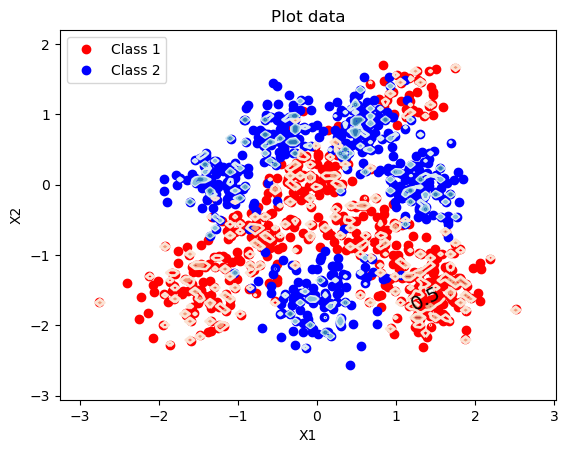

Final training log-likelihood per datapoint: -0.0997
Final test log-likelihood per datapoint: -0.2627


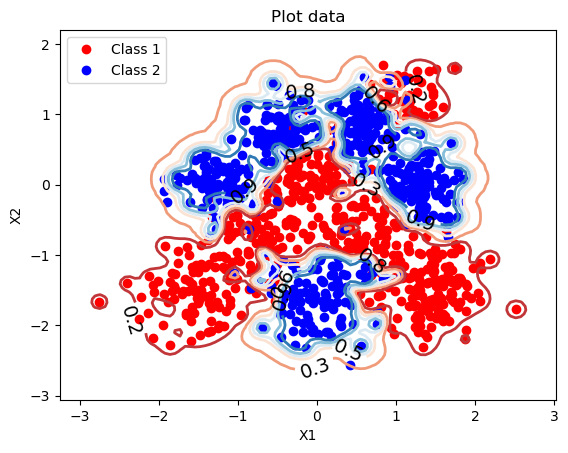

Final training log-likelihood per datapoint: -0.2169
Final test log-likelihood per datapoint: -0.2054


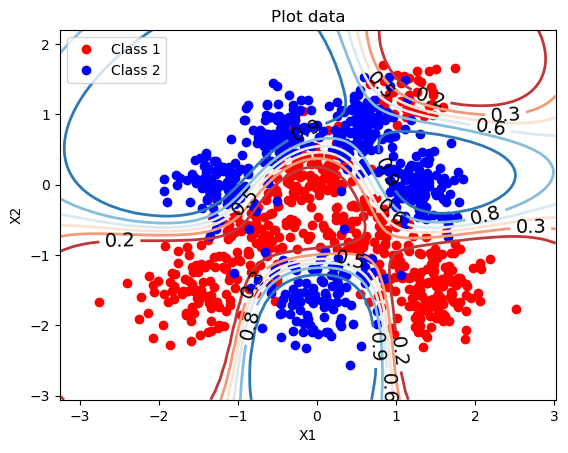

In [110]:
# We expand the data

def expansion_exercise(l_set, alpha_set):
    for i in l_set:

        l = i #XXX Width of the Gaussian basis funcction. To be completed by the student

        X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
        X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

        # We train the new classifier on the feature expanded inputs

        alpha = alpha_set[l_set.index(i)]# XXX Learning rate for gradient-based optimisation with basis functions. To be completed by the student
        n_steps = 10000# XXX Number of steps of gradient-based optimisation with basis functions. To be completed by the student

        w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

        # We plot the training and test log likelihoods

        #plot_ll(ll_train)
        #plot_ll(ll_test)

        # Compute final log-likelihood per datapoint
        final_ll_train = compute_average_ll(X_tilde_train, y_train, w)
        final_ll_test = compute_average_ll(X_tilde_test, y_test, w)

        print(f"Final training log-likelihood per datapoint: {final_ll_train:.4f}")
        print(f"Final test log-likelihood per datapoint: {final_ll_test:.4f}")
        # We plot the predictive distribution

        plot_predictive_distribution(X, y, w, lambda x : evaluate_basis_functions(l, x, X_train))

#l_set = [0.01,0.1,1]
#alpha_set = [0.0005, 0.005, 0.05]

#expansion_exercise(l_set, alpha_set)

expansion_exercise([0.01], [0.005])
expansion_exercise([0.1], [0.0008])
expansion_exercise([1], [0.00005])

Final training log-likelihood per datapoint: -0.0206
Final test log-likelihood per datapoint: -0.6758


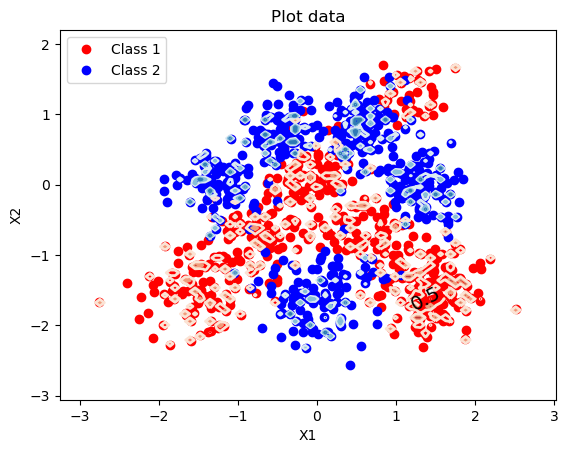


Confusion Matrix:
          Predicted 0    Predicted 1
True 0    0.9817        0.0183
True 1    0.8791        0.1209
Final training log-likelihood per datapoint: -0.1003
Final test log-likelihood per datapoint: -0.2654


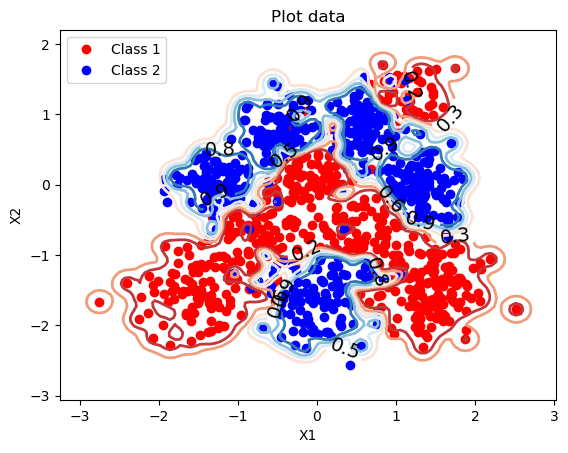


Confusion Matrix:
          Predicted 0    Predicted 1
True 0    0.9174        0.0826
True 1    0.1429        0.8571
Final training log-likelihood per datapoint: -0.2176
Final test log-likelihood per datapoint: -0.2063


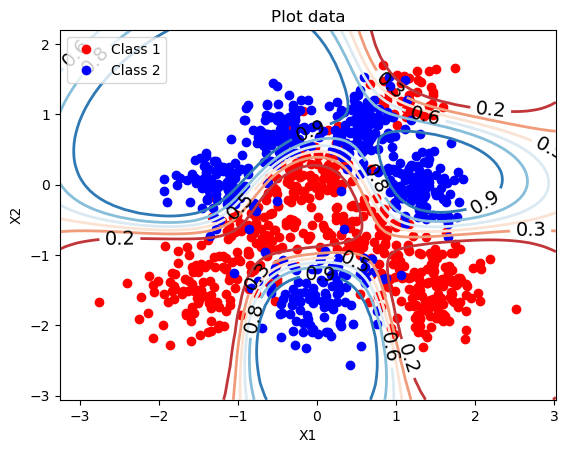


Confusion Matrix:
          Predicted 0    Predicted 1
True 0    0.8899        0.1101
True 1    0.0549        0.9451
Final training log-likelihood per datapoint: -0.0208
Final test log-likelihood per datapoint: -0.6771


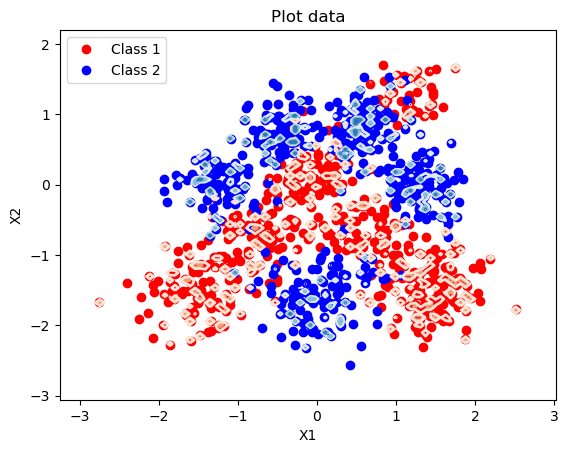


Confusion Matrix:
          Predicted 0    Predicted 1
True 0    0.9817        0.0183
True 1    0.8681        0.1319
Final training log-likelihood per datapoint: -0.0995
Final test log-likelihood per datapoint: -0.2603


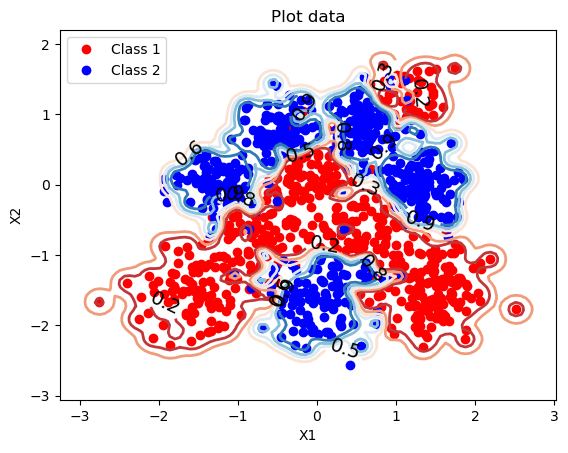


Confusion Matrix:
          Predicted 0    Predicted 1
True 0    0.9174        0.0826
True 1    0.1209        0.8791
Final training log-likelihood per datapoint: -0.2147
Final test log-likelihood per datapoint: -0.2021


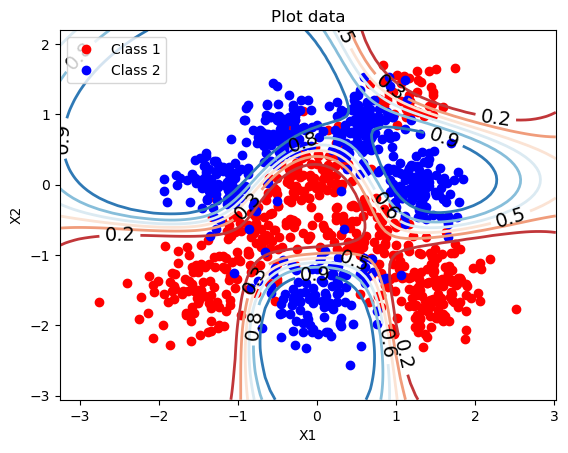


Confusion Matrix:
          Predicted 0    Predicted 1
True 0    0.8991        0.1009
True 1    0.0549        0.9451


In [ ]:
# We expand the data

def expansion_exercise(l_set, alpha_set):
    for i in l_set:

        l = i #XXX Width of the Gaussian basis funcction. To be completed by the student

        X_tilde_train = get_x_tilde(evaluate_basis_functions(l, X_train, X_train))
        X_tilde_test = get_x_tilde(evaluate_basis_functions(l, X_test, X_train))

        # We train the new classifier on the feature expanded inputs

        alpha = alpha_set[l_set.index(i)]# XXX Learning rate for gradient-based optimisation with basis functions. To be completed by the student
        n_steps = 10000# XXX Number of steps of gradient-based optimisation with basis functions. To be completed by the student

        w, ll_train, ll_test = fit_w(X_tilde_train, y_train, X_tilde_test, y_test, n_steps, alpha)

        # We plot the training and test log likelihoods

        #plot_ll(ll_train)
        #plot_ll(ll_test)

        # Compute final log-likelihood per datapoint
        final_ll_train = compute_average_ll(X_tilde_train, y_train, w)
        final_ll_test = compute_average_ll(X_tilde_test, y_test, w)

        print(f"Final training log-likelihood per datapoint: {final_ll_train:.4f}")
        print(f"Final test log-likelihood per datapoint: {final_ll_test:.4f}")
        # We plot the predictive distribution

        plot_predictive_distribution(X, y, w, lambda x : evaluate_basis_functions(l, x, X_train))

        # Predict probabilities
        y_test_pred_prob = predict(X_tilde_test, w)

        # Apply threshold at τ = 0.5 to get binary class predictions
        y_test_pred = (y_test_pred_prob > 0.5).astype(int)

        # Compute confusion matrix
        true_negatives = np.sum((y_test == 0) & (y_test_pred == 0))
        false_positives = np.sum((y_test == 0) & (y_test_pred == 1))
        false_negatives = np.sum((y_test == 1) & (y_test_pred == 0))
        true_positives = np.sum((y_test == 1) & (y_test_pred == 1))

        # more efficient code below
        # false_positives = np.sum((y_test == 0) & (y_test_pred))
        # false_negatives = np.sum((y_test == 1) & (np.logical_not(y_test_pred))

        # Compute fractions
        total_negatives = np.sum(y_test == 0)
        total_positives = np.sum(y_test == 1)

        P_yhat0_y0 = true_negatives / total_negatives  # P(ŷ = 0 | y = 0)
        P_yhat1_y0 = false_positives / total_negatives  # P(ŷ = 1 | y = 0)
        P_yhat0_y1 = false_negatives / total_positives  # P(ŷ = 0 | y = 1)
        P_yhat1_y1 = true_positives / total_positives  # P(ŷ = 1 | y = 1)

        # Print confusion matrix
        print("\nConfusion Matrix:")
        print(f"          Predicted 0    Predicted 1")
        print(f"True 0    {P_yhat0_y0:.4f}        {P_yhat1_y0:.4f}")
        print(f"True 1    {P_yhat0_y1:.4f}        {P_yhat1_y1:.4f}")


l_set = [0.01,0.1,1]
alpha_set = [0.005, 0.0008, 0.00005]

expansion_exercise(l_set, alpha_set)

#expansion_exercise([0.01], [0.005])
#expansion_exercise([0.1], [0.0008])
#expansion_exercise([1], [0.00005])
